# THE SPARKS FOUNDATION

## DATA SCIENCE AND BUSINESS ANALYTICS JUNE'21

AUTHOUR: EVAKATTU MUNI ESHWAR

Task 1: Prediction using Supervised ML 
Objective: From given dataset, predict the percentage of an student based on the no. of study hours.



DATASET: http://bit.ly/w-data


IMPORTING LIBRARIES

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

IMPORTING DATA

In [223]:
data="http://bit.ly/w-data"
df=pd.read_csv(data)
print("Data Impoted Sucessfully")
df.head()

Data Impoted Sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Checking whether the data consists of null values

In [224]:
df.isna()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### Describing the data
Which provides statistical info of our data

In [225]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's visualise our data

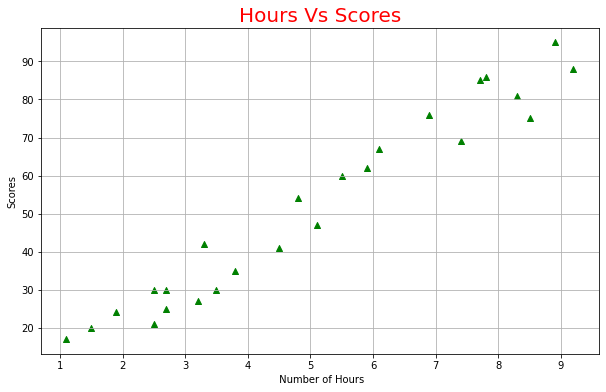

In [247]:
plt.figure(figsize=(10,6))

plt.scatter(df.Hours,df.Scores, color=["green"] ,marker="^")
plt.title("Hours Vs Scores",color="red",fontsize=20)
plt.xlabel(" Number of Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

Preparing the Data


In [227]:
X = df.drop("Scores", axis=1)  
y = df.Scores

In [228]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,
                                                y,
                                                test_size=0.2,shuffle=False)

Training the model

In [229]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
print ("Coefficient:-", reg.coef_)
print ("Intercept:-", reg.intercept_)

Coefficient:- [9.52038609]
Intercept:- 3.0312830386057854


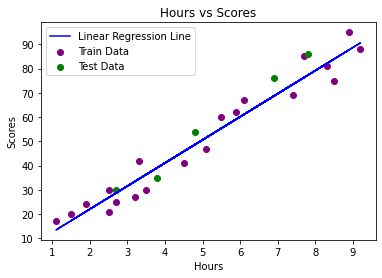

In [231]:
# defining regression line
line = reg.coef_*x+reg.intercept_

# plotting for the test data
plt.scatter(x_train, y_train, label='Train Data',color='purple')
plt.scatter(x_test, y_test, label='Test Data',color='green')

plt.plot(x, line, color='blue', label='Linear Regression Line')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.legend()
plt.show()

Prdicting values from our trained model

In [232]:
y_preds=reg.predict(x_test)
y_preds

array([28.73632549, 48.72913629, 39.2087502 , 68.72194709, 77.29029458])

In [233]:
y_test.values

array([30, 54, 35, 76, 86])

In [234]:
df2=pd.DataFrame({"Actual": y_test, "Predicted": y_preds})
df2

,Actual,Predicted
20,30,28.736325
21,54,48.729136
22,35,39.208750
23,76,68.721947
24,86,77.290295


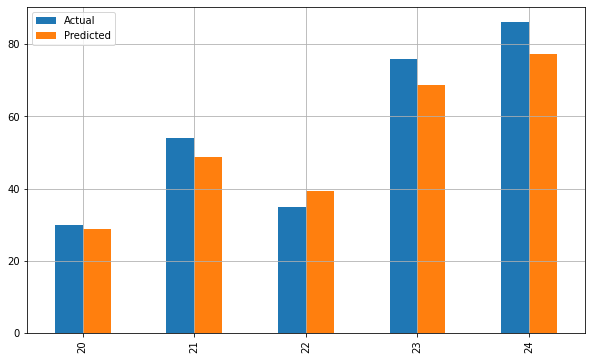

In [255]:
df2.plot(kind="bar", figsize=(10,6))
plt.grid()
plt.show();

Finally let's score our model

In [236]:
print("Testing Score:{}" .format(reg.score(x_test,y_test)))


Testing Score:0.9273291976521455


In [237]:
# Custom predictions
hours=9.25
pred_score = reg.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 91.09485441683265


In [215]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preds))
print("Mean Squared error:", metrics.mean_squared_error(y_test, y_preds))
print("Root Mean Squared Error:-",np.sqrt(metrics.mean_squared_error(y_test,y_preds)))
print("Explained Variance Score:-",metrics.explained_variance_score(y_test,y_preds))
print("R^2:-", metrics.r2_score(y_test, y_preds))

Mean Absolute Error: 5.346209347444651
Mean Squared error: 35.18429566473721
Root Mean Squared Error:- 5.931635159442733
Explained Variance Score:- 0.9550378872993898
R^2:- 0.9273291976521455
